In [127]:
import tensorly as tl
from tensorly.decomposition import parafac
import numpy as np
# import tensorflow as tf
import h5py

In [166]:
with h5py.File('distance_tensor.h5', 'r') as hf:
    data = hf['distance_tensor'][:]

print("The shape of the tensor is {}.".format(data.shape))
print(data[0])

The shape of the tensor is (47, 100, 100).
[[0.         1.13643027 2.21913232 ... 1.53740964 1.3629114  1.88236283]
 [1.13643027 0.         2.28072074 ... 1.35106411 1.78818586 2.02638166]
 [2.21913232 2.28072074 0.         ... 1.71916066 2.05953426 2.30436834]
 ...
 [1.53740964 1.35106411 1.71916066 ... 0.         1.5052344  1.53977043]
 [1.3629114  1.78818586 2.05953426 ... 1.5052344  0.         1.85712806]
 [1.88236283 2.02638166 2.30436834 ... 1.53977043 1.85712806 0.        ]]


In [167]:
factors = parafac(data, rank=1)
res = data - tl.kruskal_to_tensor(factors)

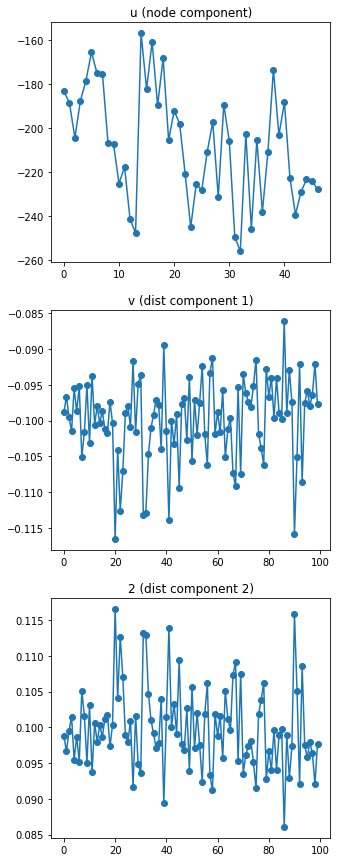

In [174]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,15))

axes[0].set_title('u (node component)')
axes[0].plot([row for row in range(len(factors[0]))], factors[0], '-o')

axes[1].set_title('v (dist component 1)')
axes[1].plot([row for row in range(len(factors[1]))], factors[1], '-o')

axes[2].set_title('2 (dist component 2)')
axes[2].plot([row for row in range(len(factors[2]))], factors[2], '-o')

plt.savefig('../../distance_parafac', dpi=500)

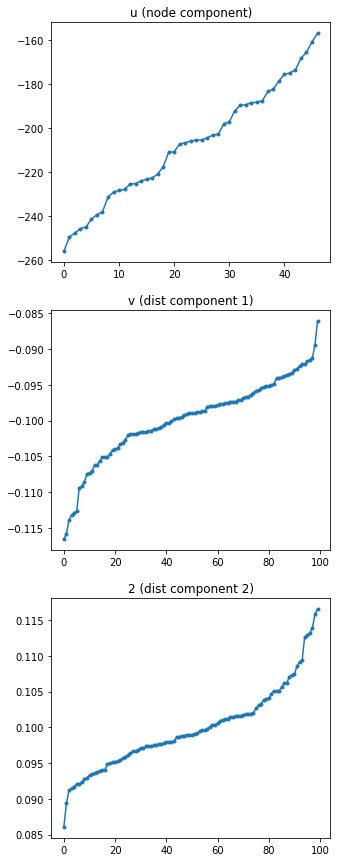

In [183]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,15))

axes[0].set_title('u (node component)')
axes[0].plot([row for row in range(len(factors[0]))], sorted(factors[0]), '-o', markersize=3)

axes[1].set_title('v (dist component 1)')
axes[1].plot([row for row in range(len(factors[1]))], sorted(factors[1]), '-o', markersize=3)

axes[2].set_title('2 (dist component 2)')
axes[2].plot([row for row in range(len(factors[2]))], sorted(factors[2]), '-o', markersize=3)

plt.savefig('../../distance_parafac_sorted', dpi=500)